In [1]:
# Import necessary libraries and functions
import os
import itertools
from collections import defaultdict
import re
import sys
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import openpyxl
from scipy.stats import shapiro, kstest, levene, probplot
from scipy.stats import kruskal
import scikit_posthocs as sp
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [ ]:
# Loading all necessary data 

# Start timer
start_time = time.time()

# Base directory for the participant data
base_dir = '../data/out/subjects/'

# Define participant groups
YACs = ['101', '102', '103', '104', '105', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120']
OACs = ['202', '205', '206', '207', '208', '209', '210', '211', '214', '215', '216', '217', '218', '219', '221']
TCOAs = ['401', '402', '403', '404', '406', '407', '408', '409', '410', '411', '412', '413', '414', '415', '416']

# Combine all participants
all_participants = YACs + OACs + TCOAs
modes = ['EC', 'EO']

# Load labels from the atlas
labels = [
    '7Networks_LH_Cont_Cing_1-lh',
    '7Networks_LH_Cont_Par_1-lh',
    '7Networks_LH_Cont_PFCl_1-lh',
    '7Networks_LH_Cont_pCun_1-lh',
    '7Networks_LH_Default_Par_1-lh',
    '7Networks_LH_Default_Par_2-lh',
    '7Networks_LH_Default_pCunPCC_1-lh',
    '7Networks_LH_Default_pCunPCC_2-lh',
    '7Networks_LH_Default_PFC_1-lh',
    '7Networks_LH_Default_PFC_2-lh',
    '7Networks_LH_Default_PFC_3-lh',
    '7Networks_LH_Default_PFC_4-lh',
    '7Networks_LH_Default_PFC_5-lh',
    '7Networks_LH_Default_PFC_6-lh',
    '7Networks_LH_Default_PFC_7-lh',
    '7Networks_LH_Default_Temp_1-lh',
    '7Networks_LH_Default_Temp_2-lh',
    '7Networks_LH_DorsAttn_FEF_1-lh',
    '7Networks_LH_DorsAttn_Post_1-lh',
    '7Networks_LH_DorsAttn_Post_2-lh',
    '7Networks_LH_DorsAttn_Post_3-lh',
    '7Networks_LH_DorsAttn_Post_4-lh',
    '7Networks_LH_DorsAttn_Post_5-lh',
    '7Networks_LH_DorsAttn_Post_6-lh',
    '7Networks_LH_DorsAttn_PrCv_1-lh',
    '7Networks_LH_Limbic_OFC_1-lh',
    '7Networks_LH_Limbic_TempPole_1-lh',
    '7Networks_LH_Limbic_TempPole_2-lh',
    '7Networks_LH_SalVentAttn_FrOperIns_1-lh',
    '7Networks_LH_SalVentAttn_FrOperIns_2-lh',
    '7Networks_LH_SalVentAttn_Med_1-lh',
    '7Networks_LH_SalVentAttn_Med_2-lh',
    '7Networks_LH_SalVentAttn_Med_3-lh',
    '7Networks_LH_SalVentAttn_ParOper_1-lh',
    '7Networks_LH_SalVentAttn_PFCl_1-lh',
    '7Networks_LH_SomMot_1-lh',
    '7Networks_LH_SomMot_2-lh',
    '7Networks_LH_SomMot_3-lh',
    '7Networks_LH_SomMot_4-lh',
    '7Networks_LH_SomMot_5-lh',
    '7Networks_LH_SomMot_6-lh',
    '7Networks_LH_Vis_1-lh',
    '7Networks_LH_Vis_2-lh',
    '7Networks_LH_Vis_3-lh',
    '7Networks_LH_Vis_4-lh',
    '7Networks_LH_Vis_5-lh',
    '7Networks_LH_Vis_6-lh',
    '7Networks_LH_Vis_7-lh',
    '7Networks_LH_Vis_8-lh',
    '7Networks_LH_Vis_9-lh',
    '7Networks_RH_Cont_Cing_1-rh',
    '7Networks_RH_Cont_Par_1-rh',
    '7Networks_RH_Cont_Par_2-rh',
    '7Networks_RH_Cont_PFCl_1-rh',
    '7Networks_RH_Cont_PFCl_2-rh',
    '7Networks_RH_Cont_PFCl_3-rh',
    '7Networks_RH_Cont_PFCl_4-rh',
    '7Networks_RH_Cont_PFCmp_1-rh',
    '7Networks_RH_Cont_pCun_1-rh',
    '7Networks_RH_Default_Par_1-rh',
    '7Networks_RH_Default_pCunPCC_1-rh',
    '7Networks_RH_Default_pCunPCC_2-rh',
    '7Networks_RH_Default_PFCdPFCm_1-rh',
    '7Networks_RH_Default_PFCdPFCm_2-rh',
    '7Networks_RH_Default_PFCdPFCm_3-rh',
    '7Networks_RH_Default_PFCv_1-rh',
    '7Networks_RH_Default_PFCv_2-rh',
    '7Networks_RH_Default_Temp_1-rh',
    '7Networks_RH_Default_Temp_2-rh',
    '7Networks_RH_Default_Temp_3-rh',
    '7Networks_RH_DorsAttn_FEF_1-rh',
    '7Networks_RH_DorsAttn_Post_1-rh',
    '7Networks_RH_DorsAttn_Post_2-rh',
    '7Networks_RH_DorsAttn_Post_3-rh',
    '7Networks_RH_DorsAttn_Post_4-rh',
    '7Networks_RH_DorsAttn_Post_5-rh',
    '7Networks_RH_DorsAttn_PrCv_1-rh',
    '7Networks_RH_Limbic_OFC_1-rh',
    '7Networks_RH_Limbic_TempPole_1-rh',
    '7Networks_RH_SalVentAttn_FrOperIns_1-rh',
    '7Networks_RH_SalVentAttn_Med_1-rh',
    '7Networks_RH_SalVentAttn_Med_2-rh',
    '7Networks_RH_SalVentAttn_TempOccPar_1-rh',
    '7Networks_RH_SalVentAttn_TempOccPar_2-rh',
    '7Networks_RH_SomMot_1-rh',
    '7Networks_RH_SomMot_2-rh',
    '7Networks_RH_SomMot_3-rh',
    '7Networks_RH_SomMot_4-rh',
    '7Networks_RH_SomMot_5-rh',
    '7Networks_RH_SomMot_6-rh',
    '7Networks_RH_SomMot_7-rh',
    '7Networks_RH_SomMot_8-rh',
    '7Networks_RH_Vis_1-rh',
    '7Networks_RH_Vis_2-rh',
    '7Networks_RH_Vis_3-rh',
    '7Networks_RH_Vis_4-rh',
    '7Networks_RH_Vis_5-rh',
    '7Networks_RH_Vis_6-rh',
    '7Networks_RH_Vis_7-rh',
    '7Networks_RH_Vis_8-rh'
]
labels = np.array(labels)

# Store loaded data in dictionaries
within_network_conn_values = {}
between_network_conn_values = {}
aggregated_within_conn = {}
aggregated_between_conn = {}
median_optimal_states = {}
transition_probabilities = {}
fractional_occupancy = {}
mean_lifetime = {}
mean_interval_length = {}
networks = None  # Initialize networks variable

# Initialize dictionaries for temporal and spatial features
temporal_spatial_features = {
    'ID': [],
    'Mode': [],
    'Transition_Probabilities': [],
    'Mean_Lifetime': [],
    'Fractional_Occupancy': [],
    'Mean_Interval_Length': [],
    'Within_Network_Conn': [],
    'Between_Network_Conn': []
}

# Load median_optimal_states
median_optimal_states = {}
for mode in modes:
    median_optimal_state_file = os.path.join(base_dir, f"median_optimal_state_{mode}.txt")
    with open(median_optimal_state_file, "r") as f:
        content = f.read().strip()
        match = re.search(r'Median Optimal State \({}\): (\d+\.\d+)'.format(mode.upper()), content)
        if match:
            median_optimal_state = int(float(match.group(1)))
            median_optimal_states[mode] = median_optimal_state
        else:
            print(f"Error: Could not extract median_optimal_state from file: {median_optimal_state_file}")

def load_and_populate_data(participant, mode, base_dir):
    global networks  # Ensure networks is global to be accessed outside the function
    try:
        input_dir = os.path.join(base_dir, participant, mode)

        # Load HMM state info (state sequences, state probability)
        state_sequence_file = os.path.join(input_dir, f"{participant}_state_sequence.npy")
        state_probs_file = os.path.join(input_dir, f"{participant}_state_probs.npy")
        state_sequence = np.load(state_sequence_file)
        state_probs = np.load(state_probs_file)
        
        # Load temporal features from the HMM
        temporal_features_file = os.path.join(input_dir, f"{participant}_temporal_features.npz")
        temporal_features = np.load(temporal_features_file)
        transition_probabilities[(participant, mode)] = temporal_features['transition_probabilities']
        fractional_occupancy[(participant, mode)] = temporal_features['fractional_occupancy']
        mean_lifetime[(participant, mode)] = temporal_features['mean_lifetime']
        mean_interval_length[(participant, mode)] = temporal_features['mean_interval_length']

        # Load network assignments required for all spatial features found below
        network_assignment_file = os.path.join(input_dir, f"{participant}_network_assignment.npy")
        networks = np.load(network_assignment_file, allow_pickle=True).item()

        # Load spatial features (functional connectivity) from the HMM: within-network connectivity
        within_conn_file = os.path.join(input_dir, f"{participant}_{mode}_within_network_conn.npz")
        within_conn_data = np.load(within_conn_file, allow_pickle=True)
        within_network_conn_values[(participant, mode)] = {
            tuple(map(int, key.split("_")[-1].strip("()").split(", "))): within_conn_data[key].tolist()
            for key in within_conn_data.files
        }

        # Load spatial features (functional connectivity) from the HMM: between-network connectivity
        between_conn_file = os.path.join(input_dir, f"{participant}_{mode}_between_network_conn.npz")
        between_conn_data = np.load(between_conn_file, allow_pickle=True)
        between_network_conn_values[(participant, mode)] = {
            tuple(map(int, key.split("_")[-1].strip("()").split(", "))): between_conn_data[key].tolist()
            for key in between_conn_data.files
        }

        # Load spatial features (functional connectivity) from the HMM: aggregated-network (aggregated across windows) connectivity
        aggregated_conn_file = os.path.join(input_dir, f"{participant}_{mode}_aggregated_conn.npz")
        aggregated_conn = np.load(aggregated_conn_file, allow_pickle=True)
        aggregated_within_conn[(participant, mode)] = aggregated_conn['within_conn'].item()
        aggregated_between_conn[(participant, mode)] = aggregated_conn['between_conn'].item()

        # Populate the temporal_spatial_features dictionary
        temporal_spatial_features['ID'].append(participant)
        temporal_spatial_features['Mode'].append(mode)
        temporal_spatial_features['Transition_Probabilities'].append(temporal_features['transition_probabilities'])
        temporal_spatial_features['Mean_Lifetime'].append(temporal_features['mean_lifetime'])
        temporal_spatial_features['Fractional_Occupancy'].append(temporal_features['fractional_occupancy'])
        temporal_spatial_features['Mean_Interval_Length'].append(temporal_features['mean_interval_length'])
        temporal_spatial_features['Within_Network_Conn'].append(within_network_conn_values[(participant, mode)])
        temporal_spatial_features['Between_Network_Conn'].append(between_network_conn_values[(participant, mode)])

       # print(f"Loaded and populated data for participant: {participant}, mode: {mode}")  # Debugging statement

        return True
    except Exception as e:
        print(f"Error loading data for participant: {participant}, mode: {mode}. Reason: {str(e)}", flush=True)
        return False

# Process participants and modes
successful_loads = []
failed_loads = []

for participant in all_participants:
    for mode in modes:
        if load_and_populate_data(participant, mode, base_dir):
            successful_loads.append((participant, mode))
        else:
            failed_loads.append((participant, mode))

# Check if data is loaded and populated
print(f"Total successful loads: {len(successful_loads)}")
print(f"Total failed loads: {len(failed_loads)}")

if failed_loads:
    print(f"Failed to load data for {len(failed_loads)} participant-mode pairs.", flush=True)
    for participant, mode in failed_loads:
        print(f" - Participant: {participant}, Mode: {mode} - Reason: Loading error", flush=True)
        
total_time_taken = (time.time() - start_time) / 60
print(f"Total processing time: {total_time_taken:.2f} minutes.")

Total successful loads: 90
Total failed loads: 0
Total processing time: 1.33 minutes.


In [3]:
# Building the Dataframe 

# Start timer
start_time = time.time()

# Load the participant info data
file_path = "/home/cerna3/neuroconn/data analyses/PCD_TCOA_subj_info.xlsx"
info_data = pd.read_excel(file_path)

# Convert ID columns to string to ensure matching data types
info_data['ID'] = info_data['ID'].astype(str)
temporal_spatial_features['ID'] = [str(id) for id in temporal_spatial_features['ID']]

# Convert to DataFrame
temporal_spatial_features_df = pd.DataFrame(temporal_spatial_features)

# Convert ID column to string to ensure matching data types
info_data['ID'] = info_data['ID'].astype(str)

# Convert 'Height' from cm to meters for BMI calculation
info_data['Height'] = info_data['Height'] / 100

# Calculate BMI
info_data['BMI'] = info_data['Weight'] / (info_data['Height'] ** 2)

# Create age groups (young vs old)
info_data['Age_Group'] = np.where(info_data['Age'] <= 64, 'Younger Adult', 'Older Adult')

# Add a column for Practice (Practice vs. No Practice)
info_data['Practice'] = np.where(info_data['ID'].astype(str).isin(TCOAs), 'Practice', 'No Practice')

# Duplicate the participant data for each mode
info_data_duplicated = pd.concat([info_data] * len(modes), ignore_index=True)

# Add a new column for the mode
info_data_duplicated['Mode'] = modes * len(info_data)

# Merge the duplicated participant data with the temporal and spatial features
merged_data = pd.merge(info_data_duplicated, temporal_spatial_features_df, on=['ID', 'Mode'])

# Load the practitioners' practice hours data
practice_hours_file_path = "/home/cerna3/neuroconn/data analyses/Participant Experience - TCOA 401-416.xlsx"
practice_hours_data = pd.read_excel(practice_hours_file_path, usecols=['ID', 'Experience'])

# Convert ID column to string to ensure matching data types
practice_hours_data['ID'] = practice_hours_data['ID'].astype(str)

# Rename the 'Experience (hours)' column to 'Accumulated Practice Hours'
practice_hours_data = practice_hours_data.rename(columns={'Experience': 'Accumulated Practice Hours'})

# Duplicate the practice hours data for each mode
practice_hours_data_duplicated = pd.concat([practice_hours_data] * len(modes), ignore_index=True)

# Add a new column for the mode
practice_hours_data_duplicated['Mode'] = modes * len(practice_hours_data)

# Merge the practice hours data with the merged_data dataframe
final_merged_data = pd.merge(merged_data, practice_hours_data_duplicated, on=['ID', 'Mode'], how='left')

# Load RBANS and miniBEST data
rbans_and_miniBEST_file_path = "/home/cerna3/neuroconn/data analyses/RBANS_and_miniBEST.xlsx"
rbans_and_miniBEST_data = pd.read_excel(rbans_and_miniBEST_file_path, usecols=['ID', 'final_score_RBANS', 'final_score_miniBEST'])

# Convert ID column to string to ensure matching data types
rbans_and_miniBEST_data['ID'] = rbans_and_miniBEST_data['ID'].astype(str)

# Duplicate the RBANS data for each mode
rbans_and_miniBEST_data_duplicated = pd.concat([rbans_and_miniBEST_data] * len(modes), ignore_index=True)

# Add a new column for the mode
rbans_and_miniBEST_data_duplicated['Mode'] = modes * len(rbans_and_miniBEST_data)

# Merge the RBANS data with the final_merged_data dataframe
final_merged_data = pd.merge(final_merged_data, rbans_and_miniBEST_data_duplicated, on=['ID', 'Mode'], how='left')

# List the columns in the desired order
columns_order = ['ID', 'Mode', 'Project',  'Gender', 'Weight', 'Height', 'BMI', 'Age', 'Age_Group', 'Practice', 'final_score_RBANS',
                 'final_score_miniBEST', 'Accumulated Practice Hours']

# finalizing order of columns in final dataframe
final_merged_data = final_merged_data[columns_order + [col for col in final_merged_data.columns if col not in columns_order]]

### ADD MEAN AND TRANSITION MAGNITUDE VALUES TO DATAFRAME ###

# Function to load state files
def load_state_files(participant, mode):
    state_probs_file = os.path.join(base_dir, participant, mode, f"{participant}_state_probs.npy")
    state_sequence_file = os.path.join(base_dir, participant, mode, f"{participant}_state_sequence.npy")
    state_probs = np.load(state_probs_file)
    state_sequence = np.load(state_sequence_file)
    return state_probs, state_sequence

# Function to calculate transition magnitudes
def calc_transition_magnitudes(conn_data, state_probs):
    """
    Calculate the transition magnitudes between states based on the connectivity data and state probabilities.

    Args:
        conn_data (dict): A dictionary containing the connectivity data for each state.
        state_probs (numpy.ndarray): Array of state probabilities.

    Returns:
        numpy.ndarray: A 2D array representing the transition magnitudes between states.
    """
    states = sorted(conn_data.keys())
    num_states = len(states)
    transition_magnitudes = np.zeros((num_states, num_states))

    for i in range(num_states):
        for j in range(num_states):
            if j < state_probs.shape[1]:  # Ensure j is within the bounds of state_probs
                if isinstance(conn_data[states[j]], dict):
                    magnitude_sum = 0
                    num_pairs = len(conn_data[states[j]])
                    for pair in conn_data[states[j]]:
                        magnitude_sum += abs(conn_data[states[j]][pair]) - abs(conn_data[states[i]][pair])
                    avg_magnitude = magnitude_sum / num_pairs
                    transition_magnitudes[i, j] = avg_magnitude * state_probs[:, j].mean()
                else:
                    magnitude = abs(conn_data[states[j]]) - abs(conn_data[states[i]])
                    transition_magnitudes[i, j] = magnitude * state_probs[:, j].mean()

    # Apply z-score normalization
    mean_magnitude = np.mean(transition_magnitudes)
    std_magnitude = np.std(transition_magnitudes)
    transition_magnitudes = (transition_magnitudes - mean_magnitude) / std_magnitude

    # Convert the transition magnitudes array to a dictionary with state numbers
    transition_magnitudes_dict = {i: transition_magnitudes[i, :].tolist() for i in range(num_states)}

    return transition_magnitudes_dict


# Function to process each participant
def process_participant(participant, network_parcels, network_parcel_names, network_pairs, between_network_conn_values):
    results = []

    for mode in modes:
        if (participant, mode) in failed_loads:
            continue

        within_network_conn_values_part = within_network_conn_values[(participant, mode)]
        between_network_conn_values_part = between_network_conn_values[(participant, mode)]
        state_probs, state_sequence = load_state_files(participant, mode)
        optimal_state = median_optimal_states.get(mode)
        within_net_conn_dict = {network: {} for network in network_parcels}
        between_net_conn_dict = {pair: {} for pair in network_pairs}

        # Process within-network connectivity
        for state in range(optimal_state):
            for window in range(len(within_network_conn_values_part)):
                if (state, window) in within_network_conn_values_part:
                    conn_data = within_network_conn_values_part[(state, window)]

                    parsed_data = {}
                    for conn_str in conn_data:
                        network, parcel1, _, connectivity, _, parcel2 = conn_str.split(' ')
                        pair = (parcel1, parcel2)
                        value = float(connectivity)
                        parsed_data[pair] = value

                    for network in networks:
                        parcel_names = network_parcel_names[network]
                        # Take absolute values of connectivity before averaging
                        connectivity_values = [abs(parsed_data[(parcel1, parcel2)]) 
                                               for parcel1, parcel2 in itertools.combinations(parcel_names, 2)]
                        within_net_conn_dict[network].setdefault(state, []).append(np.mean(connectivity_values))

        # Process between-network connectivity
        for state in range(optimal_state):
            for window in range(len(between_network_conn_values_part)):
                if (state, window) in between_network_conn_values_part:
                    conn_data = between_network_conn_values_part[(state, window)]

                    parsed_data = {}
                    for conn_str in conn_data:
                        parts = conn_str.split(' - ')
                        network_pair = parts[0].split(': ')[0].strip('[]')
                        parcel1 = parts[0].split(': ')[1].strip()
                        connectivity = float(parts[1].strip())
                        parcel2 = parts[2].strip()
                        network1, network2 = network_pair.split(', ')
                        parsed_data[(network1, parcel1, network2, parcel2)] = connectivity

                    for network_pair in network_pairs:
                        network1, network2 = network_pair.split(', ')
                        parcel_names1 = network_parcel_names[network1]
                        parcel_names2 = network_parcel_names[network2]
                        # Take absolute values of connectivity before averaging
                        between_net_conn_dict[network_pair].setdefault(state, []).append(np.mean(
                            [abs(parsed_data[(network1, parcel1, network2, parcel2)])
                             for parcel1, parcel2 in itertools.product(parcel_names1, parcel_names2)
                             if (network1, parcel1, network2, parcel2) in parsed_data]))

        # Calculate within-network connectivity mean
        within_net_conn_mean = {network: {state: np.mean(conn_values) for state, conn_values in within_net_conn_dict[network].items()} for network in within_net_conn_dict}
        
        # Calculate within-network transition magnitudes
        within_net_transition_magnitudes = {network: calc_transition_magnitudes(within_net_conn_mean[network], state_probs) for network in network_parcels}
        
        # Calculate between-network connectivity mean
        between_net_conn_mean = {network_pair: {state: np.mean(conn_values) for state, conn_values in between_net_conn_dict[network_pair].items()} for network_pair in between_net_conn_dict}
        
        # Calculate between-network transition magnitudes
        between_net_transition_magnitudes = {network_pair: calc_transition_magnitudes(between_net_conn_mean[network_pair], state_probs) for network_pair in network_pairs}

        results.append({
            'ID': participant,
            'Mode': mode,
            'Within_Network_Conn_Mean': within_net_conn_mean,
            'Within_Network_Transition_Magnitudes': within_net_transition_magnitudes,
            'Between_Network_Conn_Mean': between_net_conn_mean,
            'Between_Network_Transition_Magnitudes': between_net_transition_magnitudes,
        })

    return results

# Create a list to hold results for all participants and modes
all_results = []

# Define network parcels and pairs
network_parcels = {}
network_parcel_names = {}
for network, parcels in networks.items():
    network_parcels[network] = [parcel[0] for parcel in parcels]
    network_parcel_names[network] = [parcel[1] for parcel in parcels]

# Define all possible network pairs based on the provided list
network_pairs = [
    'Frontoparietal, Default',
    'Visual, Somatomotor',
    'Visual, Limbic',
    'Somatomotor, VentralAttention',
    'Visual, Default',
    'DorsalAttention, VentralAttention',
    'Limbic, Default',
    'Visual, DorsalAttention',
    'Somatomotor, Default',
    'Somatomotor, Frontoparietal',
    'Somatomotor, Limbic',
    'VentralAttention, Default',
    'Visual, VentralAttention',
    'Somatomotor, DorsalAttention',
    'DorsalAttention, Limbic',
    'VentralAttention, Limbic',
    'Visual, Frontoparietal',
    'VentralAttention, Frontoparietal',
    'DorsalAttention, Frontoparietal',
    'Limbic, Frontoparietal',
    'DorsalAttention, Default'
]

# Process each participant
for participant in all_participants:
    results = process_participant(participant, network_parcels, network_parcel_names, network_pairs, between_network_conn_values)
    all_results.extend(results)

# Convert results to DataFrame
results_df = pd.DataFrame(all_results)

# Merge with final_merged_data
final_merged_data = pd.merge(final_merged_data, results_df, on=['ID', 'Mode'], how='inner')

# Check the merged dataframe
print(f"Final merged data count: {final_merged_data.shape[0]}")

# Sort the merged dataframe by 'ID' column
final_merged_data = final_merged_data.sort_values('ID')

# Set display options to show all rows
pd.set_option('display.max_rows', None)

#print(final_merged_data) --> if I want to see the entire dataframe OR
# comment out "pd.set_option('display.max_rows', None)" and use:
#final_merged_data.head() <-- insert # of rows that I want to be displayed within the () to show table

# Save the final merged dataframe to the current working directory
output_file_path = "final_merged_data.xlsx"
final_merged_data.to_excel(output_file_path, index=False)
print(f"Final merged dataframe saved in current working directory")

# End timer, print total time taken
total_time_taken = (time.time() - start_time) / 60
print(f"Total processing time: {total_time_taken:.2f} minutes.")

Final merged data count: 90
Final merged dataframe saved in current working directory
Total processing time: 4.73 minutes.



KeyboardInterrupt



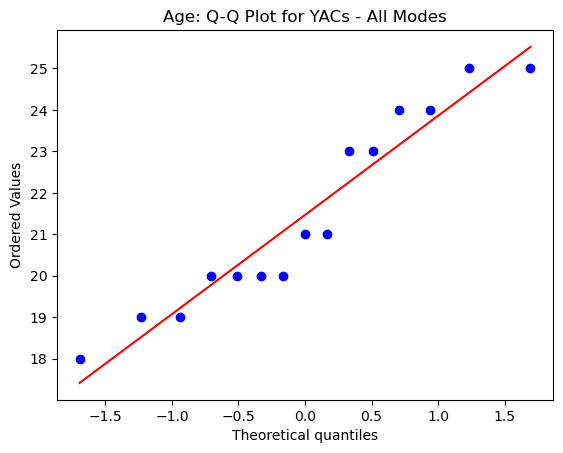

All written output has been saved to analysis_output.txt and all figures have been saved to the current working directory.
Flattened variables and calculated statistics added and saved to new dataframe successfully.
Total processing time: 2.88 minutes.


In [4]:
# Checking normality/variance for demographical variables

# Start timer
start_time = time.time()

# Redirect output to a file
output_file = open('demographic_analysis_normality_variance_output.txt', 'w')
sys.stdout = output_file

# Function to calculate descriptive statistics
def calculate_descriptives(data):
    # Flatten the data if it's a nested list or dictionary
    if isinstance(data, list) and isinstance(data[0], list):
        data = flatten_list(data)
    elif isinstance(data, dict):
        data = flatten_dict_values(data)
    
    data = pd.Series(data).dropna()  # Convert to Series and drop NaN values
    desc = data.describe()
    desc.loc['std_error'] = data.sem()
    desc = desc.loc[['min', 'max', 'mean', '50%', 'std', 'std_error']]
    desc.rename(index={'50%': 'median'}, inplace=True)
    return desc

# Function to check normality
def check_normality(data, group, mode, var_name):
    # Flatten the data if it's a nested list
    if isinstance(data, list) and isinstance(data[0], list):
        data = flatten_list(data)
    data = pd.Series(data).dropna()  # Convert to Series and drop NaN values
    
    # Descriptive statistics
    desc = calculate_descriptives(data)
    print(f"Descriptives for {var_name} - {group} - {mode}:")
    print(desc)
    
    # Shapiro-Wilk test
    shapiro_result = shapiro(data)
    print(f"\nShapiro-Wilk test for {var_name} - {group} - {mode}:")
    print(f"Statistic: {shapiro_result.statistic:.3f}, p-value: {shapiro_result.pvalue:.3f}")

    # Kolmogorov-Smirnov test
    ks_result = kstest(data, 'norm', args=(data.mean(), data.std()))
    print(f"\nKolmogorov-Smirnov test for {var_name} - {group} - {mode}:")
    print(f"Statistic: {ks_result.statistic:.3f}, p-value: {ks_result.pvalue:.3f}")

    # Histogram
    plt.figure()
    plt.hist(data, bins='auto', density=True, alpha=0.7)
    plt.title(f"{var_name}: Histogram for {group} - {mode}")
    plt.xlabel("Value")
    plt.ylabel("Density")
    plt.savefig(f"{var_name}_Histogram_{group}_{mode}.png")  # Save the figure
    plt.close()  # Ensure the plot is closed and not shown
    
    # Boxplot
    plt.figure()
    sns.boxplot(x=data)
    plt.title(f"{var_name}: Boxplot for {group} - {mode}")
    plt.xlabel("Value")
    plt.savefig(f"{var_name}_Boxplot_{group}_{mode}.png")  # Save the figure
    plt.close()  # Ensure the plot is closed and not shown
    
    # Q-Q plot
    plt.figure()
    probplot(data, plot=plt)
    plt.title(f"{var_name}: Q-Q Plot for {group} - {mode}")
    plt.savefig(f"{var_name}_QQPlot_{group}_{mode}.png")  # Save the figure
    plt.close()  # Ensure the plot is closed and not shown

# Function to check normality
def check_homogeneity(data, group, var_name):
    # Drop NaN values
    data = data.dropna()
    
    # Check if there are at least two groups
    if len(group) < 2:
        print(f"Not enough groups to perform Levene's test for {var_name}")
        return
    
    # Levene's test
    levene_result = levene(*[data[data['Group'] == g]['Value'] for g in group])
    print(f"Levene's test for {var_name} - {', '.join(group)}:")
    print(f"Statistic: {levene_result.statistic:.3f}, p-value: {levene_result.pvalue:.3f}")
    
    # Print data before creating plots
    print(f"Data for {var_name} - {', '.join(group)}:")
    print(data)
    
    # Define color palette
    color_palette = {'YACs': 'blue', 'OACs': 'orange', 'TCOAs': 'green'}
    
    # Scatter plot
    plt.figure()
    for g in group:
        sns.regplot(x='Index', y='Value', data=data[data['Group'] == g], label=g, scatter_kws={'s': 20}, line_kws={'linewidth': 2}, color=color_palette[g])
    plt.title(f"{var_name}: Scatter Plot for {', '.join(group)}")
    plt.xlabel("Index")
    plt.ylabel("Value")
    plt.legend()
    scatter_plot_path = f"{var_name}_ScatterPlot_{','.join(group)}.png"
    plt.savefig(scatter_plot_path)  # Save the figure
    print(f"Scatter plot saved to: {scatter_plot_path}")
    # Uncomment the following line to display the scatter plot in the Jupyter notebook
    # plt.show()
    plt.close()  # Ensure the plot is closed and not shown
    
    # Violin plot
    plt.figure()
    violin_plot = sns.violinplot(x='Group', y='Value', data=data, hue='Group', palette=color_palette)
    violin_plot.set(xlabel='Group', ylabel='Value')
    plt.title(f"{var_name}: Violin Plot for {', '.join(group)}")
    
    # Set labels for the violins
    for violin in violin_plot.collections:
        violin.set_label(violin.get_label().split('=')[1])
    
    plt.legend()
    violin_plot_path = f"{var_name}_ViolinPlot_{','.join(group)}.png"
    plt.savefig(violin_plot_path)  # Save the figure
    print(f"Violin plot saved to: {violin_plot_path}")
    # Uncomment the following line to display the violin plot in the Jupyter notebook
    # plt.show()
    plt.close()  # Ensure the plot is closed and not shown

# Function to check homogeneity of variances
def check_homogeneity(data, group, var_name):
    # Drop NaN values
    data = data.dropna()
    
    # Check if there are at least two groups
    if len(group) < 2:
        print(f"Not enough groups to perform Levene's test for {var_name}")
        return
    
    # Levene's test
    levene_result = levene(*[data[data['Group'] == g]['Value'] for g in group])
    print(f"Levene's test for {var_name} - {', '.join(group)}:")
    print(f"Statistic: {levene_result.statistic:.3f}, p-value: {levene_result.pvalue:.3f}")
    
    # Print data before creating plots
    print(f"Data for {var_name} - {', '.join(group)}:")
    print(data)
    
    # Define color palette
    color_palette = {'YACs': 'blue', 'OACs': 'orange', 'TCOAs': 'green'}
    
    # Scatter plot
    plt.figure()
    for g in group:
        sns.regplot(x='Index', y='Value', data=data[data['Group'] == g], label=g, scatter_kws={'s': 20}, line_kws={'linewidth': 2}, color=color_palette[g])
    plt.title(f"{var_name}: Scatter Plot for {', '.join(group)}")
    plt.xlabel("Index")
    plt.ylabel("Value")
    plt.legend()
    scatter_plot_path = f"{var_name}_ScatterPlot_{','.join(group)}.png"
    plt.savefig(scatter_plot_path)  # Save the figure
    print(f"Scatter plot saved to: {scatter_plot_path}")
    # Uncomment the following line to display the scatter plot in the Jupyter notebook
    # plt.show()
    plt.close()  # Ensure the plot is closed and not shown
    
    # Violin plot
    plt.figure()
    sns.violinplot(x='Group', y='Value', data=data, hue='Group', palette=color_palette)
    plt.title(f"{var_name}: Violin Plot for {', '.join(group)}")
    plt.xlabel("Group")
    plt.ylabel("Value")
    plt.legend()
    violin_plot_path = f"{var_name}_ViolinPlot_{','.join(group)}.png"
    plt.savefig(violin_plot_path)  # Save the figure
    print(f"Violin plot saved to: {violin_plot_path}")
    # Uncomment the following line to display the violin plot in the Jupyter notebook
    # plt.show()
    plt.close()  # Ensure the plot is closed and not shown

# Assuming your data is stored in the 'final_merged_data' DataFrame
demographic_vars = ['Age', 'BMI', 'final_score_RBANS', 'final_score_miniBEST']

# All included
#participant_groups = {'All': all_participants, 'YACs': YACs, 'OACs': OACs, 'TCOAs': TCOAs}

# All excluded
participant_groups = {'YACs': YACs, 'OACs': OACs, 'TCOAs': TCOAs}

# Analyze data for demographic variables without duplicates
for var_group, variables in [('Demographic', demographic_vars)]:
    print(f"\n--- {var_group} Variables ---")
    
    for var in variables:
        print(f"\n==== {var} ====")
        
        group_data = []
        for group, participants in participant_groups.items():
            data = final_merged_data[final_merged_data['ID'].isin(participants)][['ID', var]].drop_duplicates(subset=['ID'])
            data['Group'] = group
            data.reset_index(inplace=True)
            data.rename(columns={var: 'Value', 'index': 'Index'}, inplace=True)
            group_data.append(data)
        
        combined_data = pd.concat(group_data, ignore_index=True)
        
        for group, participants in participant_groups.items():
            data = final_merged_data[final_merged_data['ID'].isin(participants)][['ID', var]].drop_duplicates(subset=['ID'])[var]
            
            print(f"\n== {group} ==")
            check_normality(data, group, "All Modes", var)
        
        print(f"\n== Homogeneity of Variances ==")
        check_homogeneity(combined_data, list(participant_groups.keys()), var)

# Analyze 'Accumulated Practice Hours' only for TCOAs group
print("\n--- Accumulated Practice Hours ---")
var = 'Accumulated Practice Hours'
group = 'TCOAs'
participants = TCOAs

data = final_merged_data[final_merged_data['ID'].isin(participants)][['ID', var]].drop_duplicates(subset=['ID'])[var]

print(f"\n== {group} ==")
check_normality(data, group, "All Modes", var)

# Restore the original stdout to print the final message to the Jupyter notebook
sys.stdout = sys.__stdout__
print("All written output has been saved to demographic_analysis_output.txt and all figures have been saved to the current working directory.")

output_file.close()

# End timer, print total time taken
total_time_taken = (time.time() - start_time) / 60
print(f"Total processing time: {total_time_taken:.2f} minutes.")

In [5]:
# Checking normality/variance for temporal/spatial variables

# Start timer
start_time = time.time()

# Redirect output to a file
output_file = open('temporal_spatial_normality_variance_output.txt', 'w')
sys.stdout = output_file

# Unified function to flatten nested structures
def flatten(data):
    if isinstance(data, list):
        return [item for sublist in data for item in sublist]
    elif isinstance(data, np.ndarray):
        return data.flatten().tolist()
    else:
        return [data]

def flatten_within_network_conn_mean(data):
    flattened = []
    for network, states in data.items():
        flattened.extend(states.values())
    return flattened

def flatten_within_network_transition_magnitudes(data):
    flattened = []
    for network, states in data.items():
        for state, magnitudes in states.items():
            flattened.extend(magnitudes)
    return flattened

def flatten_between_network_conn_mean(data):
    flattened = []
    for pair, states in data.items():
        flattened.extend(states.values())
    return flattened

def flatten_between_network_transition_magnitudes(data):
    flattened = []
    for pair, states in data.items():
        for state, magnitudes in states.items():
            flattened.extend(magnitudes)
    return flattened

def calculate_descriptives(data):
    data = pd.Series(data).dropna()
    if data.empty:
        return None
    desc = data.describe()
    if data.dtype in [np.float64, np.int64]:
        desc.loc['std_error'] = data.sem()
    desc.rename(index={'50%': 'median'}, inplace=True)
    return desc

# Function to check normality for temporal variables
def check_normality_temporal(data, group, mode, var_name):
    flat_data = np.array(data).astype(float)
    flat_data = pd.Series(flat_data).dropna()
    desc = calculate_descriptives(flat_data)
    print(f"Descriptives for {var_name} - {group} - {mode}:")
    print(desc)
    
    # Shapiro-Wilk test
    shapiro_result = shapiro(flat_data)
    print(f"\nShapiro-Wilk test for {var_name} - {group} - {mode}:")
    print(f"Statistic: {shapiro_result.statistic:.3f}, p-value: {shapiro_result.pvalue:.3f}")

    # Kolmogorov-Smirnov test
    ks_result = kstest(flat_data, 'norm', args=(flat_data.mean(), flat_data.std()))
    print(f"\nKolmogorov-Smirnov test for {var_name} - {group} - {mode}:")
    print(f"Statistic: {ks_result.statistic:.3f}, p-value: {ks_result.pvalue:.3f}")

    # Histogram
    plt.figure()
    plt.hist(flat_data, bins='auto', density=True, alpha=0.7)
    plt.title(f"{var_name}: Histogram for {group} - {mode}")
    plt.xlabel("Value")
    plt.ylabel("Density")
    plt.savefig(f"{var_name}_Histogram_{group}_{mode}.png")  # Save the figure
    plt.close()  # Ensure the plot is closed and not shown

    # Boxplot
    plt.figure()
    sns.boxplot(x=flat_data)
    plt.title(f"{var_name}: Boxplot for {group} - {mode}")
    plt.xlabel("Value")
    plt.savefig(f"{var_name}_Boxplot_{group}_{mode}.png")  # Save the figure
    plt.close()  # Ensure the plot is closed and not shown

    # Q-Q plot
    plt.figure()
    probplot(flat_data, plot=plt)
    plt.title(f"{var_name}: Q-Q Plot for {group} - {mode}")
    plt.savefig(f"{var_name}_QQPlot_{group}_{mode}.png")  # Save the figure
    plt.close()  # Ensure the plot is closed and not shown

# Function to check normality for spatial variables
def check_normality_spatial(data, group, mode, var_name):
    flat_data = np.array(data).astype(float)
    flat_data = pd.Series(flat_data).dropna()
    desc = calculate_descriptives(flat_data)
    print(f"Descriptives for {var_name} - {group} - {mode}:")
    print(desc)
    
    # Shapiro-Wilk test
    shapiro_result = shapiro(flat_data)
    print(f"\nShapiro-Wilk test for {var_name} - {group} - {mode}:")
    print(f"Statistic: {shapiro_result.statistic:.3f}, p-value: {shapiro_result.pvalue:.3f}")

    # Kolmogorov-Smirnov test
    ks_result = kstest(flat_data, 'norm', args=(flat_data.mean(), flat_data.std()))
    print(f"\nKolmogorov-Smirnov test for {var_name} - {group} - {mode}:")
    print(f"Statistic: {ks_result.statistic:.3f}, p-value: {ks_result.pvalue:.3f}")

    # Histogram
    plt.figure()
    plt.hist(flat_data, bins='auto', density=True, alpha=0.7)
    plt.title(f"{var_name}: Histogram for {group} - {mode}")
    plt.xlabel("Value")
    plt.ylabel("Density")
    plt.savefig(f"{var_name}_Histogram_{group}_{mode}.png")  # Save the figure
    plt.close()  # Ensure the plot is closed and not shown

    # Boxplot
    plt.figure()
    sns.boxplot(x=flat_data)
    plt.title(f"{var_name}: Boxplot for {group} - {mode}")
    plt.xlabel("Value")
    plt.savefig(f"{var_name}_Boxplot_{group}_{mode}.png")  # Save the figure
    plt.close()  # Ensure the plot is closed and not shown

    # Q-Q plot
    plt.figure()
    probplot(flat_data, plot=plt)
    plt.title(f"{var_name}: Q-Q Plot for {group} - {mode}")
    plt.savefig(f"{var_name}_QQPlot_{group}_{mode}.png")  # Save the figure
    plt.close()  # Ensure the plot is closed and not shown

def check_homogeneity_temporal(data, groups, var_name):
    data = pd.concat(data).dropna()
    if len(groups) < 2:
        print(f"Not enough groups to perform Levene's test for {var_name}")
        return
    levene_result = levene(*[data[data['Group'] == g]['Value'] for g in groups])
    print(f"Levene's test for {var_name} - {', '.join(groups)}:")
    print(f"Statistic: {levene_result.statistic:.3f}, p-value: {levene_result.pvalue:.3f}")

    # Scatter plot
    plt.figure()
    for g in groups:
        sns.regplot(x='Index', y='Value', data=data[data['Group'] == g], label=g, scatter_kws={'s': 20}, line_kws={'linewidth': 2})
    plt.title(f"{var_name}: Scatter Plot for {', '.join(groups)}")
    plt.xlabel("Index")
    plt.ylabel("Value")
    plt.legend()
    plt.savefig(f"{var_name}_ScatterPlot_{groups}.png")  # Save the figure
    plt.close()  # Ensure the plot is closed and not shown

    # Violin plot
    plt.figure()
    palette = {'YACs': 'blue', 'OACs': 'orange', 'TCOAs': 'green'}
    sns.violinplot(x='Group', y='Value', data=data, palette=palette, hue='Group', legend=False)
    plt.title(f"{var_name}: Violin Plot for {', '.join(groups)}")
    plt.xlabel("Group")
    plt.ylabel("Value")
    plt.savefig(f"{var_name}_ViolinPlot_{groups}.png")  # Save the figure
    plt.close()  # Ensure the plot is closed and not shown
    
def check_homogeneity_spatial(data, groups, var_name):
    data = pd.concat(data).dropna()
    if len(groups) < 2:
        print(f"Not enough groups to perform Levene's test for {var_name}")
        return
    levene_result = levene(*[data[data['Group'] == g]['Value'] for g in groups])
    print(f"Levene's test for {var_name} - {', '.join(groups)}:")
    print(f"Statistic: {levene_result.statistic:.3f}, p-value: {levene_result.pvalue:.3f}")

    # Scatter plot
    plt.figure()
    for g in groups:
        sns.regplot(x='Index', y='Value', data=data[data['Group'] == g], label=g, scatter_kws={'s': 20}, line_kws={'linewidth': 2})
    plt.title(f"{var_name}: Scatter Plot for {', '.join(groups)}")
    plt.xlabel("Index")
    plt.ylabel("Value")
    plt.legend()
    plt.savefig(f"{var_name}_ScatterPlot_{','.join(groups)}.png")  # Save the figure
    plt.close()  # Ensure the plot is closed and not shown

    # Violin plot
    plt.figure()
    palette = {'YACs': 'blue', 'OACs': 'orange', 'TCOAs': 'green'}
    violin_plot = sns.violinplot(data=data, x='Group', y='Value', hue='Group', palette=palette, legend=False)
    plt.title(f"{var_name}: Violin Plot for {', '.join(groups)}")
    plt.xlabel("Group")
    plt.ylabel("Value")
    plt.savefig(f"{var_name}_ViolinPlot_{','.join(groups)}.png")  # Save the figure
    plt.close()  # Ensure the plot is closed and not shown
    
temporal_features = [
    'Transition_Probabilities',
    'Mean_Lifetime',
    'Fractional_Occupancy',
    'Mean_Interval_Length'
]

spatial_features = {
    'Within_Network_Conn_Mean': flatten_within_network_conn_mean,
    'Between_Network_Conn_Mean': flatten_between_network_conn_mean,
    'Within_Network_Transition_Magnitudes': flatten_within_network_transition_magnitudes,
    'Between_Network_Transition_Magnitudes': flatten_between_network_transition_magnitudes
}

modes = ['EC', 'EO']

# All included
#participant_groups = {'All': all_participants, 'YACs': YACs, 'OACs': OACs, 'TCOAs': TCOAs}

# All excluded
participant_groups = {'YACs': YACs, 'OACs': OACs, 'TCOAs': TCOAs}

# Ensure the columns exist in the DataFrame
required_columns = temporal_features + list(spatial_features.keys()) + ['ID', 'Mode']
missing_columns = [col for col in required_columns if col not in final_merged_data.columns]
if missing_columns:
    raise KeyError(f"Missing columns in the DataFrame: {missing_columns}")

# Process temporal features
for var in temporal_features:
    print(f"\n==== {var} ====")
    all_data = []
    for mode in modes:
        for group, participants in participant_groups.items():
            data = final_merged_data[(final_merged_data['ID'].isin(participants)) & (final_merged_data['Mode'] == mode)][var].apply(flatten)
            flattened_data = np.array([item for sublist in data for item in sublist]).astype(float)
            print(f"\n== {group} - {mode} ==")
            desc = calculate_descriptives(flattened_data)
            print(f"Descriptives for {var} - {group} - {mode}:")
            print(desc)
            check_normality_temporal(flattened_data, group, mode, var)

            # Ensure 'Value' is a one-dimensional list before creating the DataFrame
            group_data = pd.DataFrame({
                'Group': [group]*len(flattened_data), 
                'Value': flattened_data, 
                'Index': list(range(len(flattened_data)))
            })
            all_data.append(group_data)
    check_homogeneity_temporal(all_data, list(participant_groups.keys()), var)

# Process spatial features
for var, flatten_function in spatial_features.items():
    print(f"\n==== {var} ====")
    all_data = []
    for mode in modes:
        for group, participants in participant_groups.items():
            data = final_merged_data[(final_merged_data['ID'].isin(participants)) & (final_merged_data['Mode'] == mode)][var].apply(flatten_function)
            flattened_data = np.array([item for sublist in data for item in sublist]).astype(float)
            print(f"\n== {group} - {mode} ==")
            desc = calculate_descriptives(flattened_data)
            print(f"Descriptives for {var} - {group} - {mode}:")
            print(desc)
            check_normality_spatial(flattened_data, group, mode, var)

            # Ensure 'Value' is a one-dimensional list before creating the DataFrame
            group_data = pd.DataFrame({
                'Group': [group]*len(flattened_data), 
                'Value': flattened_data, 
                'Index': list(range(len(flattened_data)))
            })
            all_data.append(group_data)
    check_homogeneity_spatial(all_data, list(participant_groups.keys()), var)

# Restore the original stdout
sys.stdout = sys.__stdout__

print("All written output has been saved to analysis_output.txt and all figures have been saved to the current working directory.")

# Close file
output_file.close()

# SAVE FLATTENED VARIABLES FOR LATER USE

# Create a new DataFrame to hold the flattened data and calculated statistics
flattened_data_stats = final_merged_data[['ID', 'Mode']].copy()

# Save flattened temporal features and calculate statistics
for var in temporal_features:
    # Apply the flatten function to the data
    flattened_data = final_merged_data[var].apply(flatten)
    flattened_data_stats[var + '_flattened'] = flattened_data

# Save flattened spatial features and calculate statistics
for var, flatten_function in spatial_features.items():
    # Apply the specific flatten function to the data
    flattened_data = final_merged_data[var].apply(flatten_function)
    flattened_data_stats[var + '_flattened'] = flattened_data

# Ensure 'ID' and 'Mode' columns are included in the new DataFrame
flattened_data_stats['ID'] = final_merged_data['ID']
flattened_data_stats['Mode'] = final_merged_data['Mode']

# Merge the flattened data stats back into the original DataFrame
final_combined_data = pd.merge(final_merged_data, flattened_data_stats, on=['ID', 'Mode'], how='left')

# Save the new dataframe
output_file_path = '/home/cerna3/neuroconn/data analyses/final_combined_data.xlsx'
final_combined_data.to_excel(output_file_path, index=False)

print("Flattened variables and calculated statistics added and saved to new dataframe successfully.")

# Print first few rows if needed
#final_combined_data.head()

# End timer, print total time taken
total_time_taken = (time.time() - start_time) / 60
print(f"Total processing time: {total_time_taken:.2f} minutes.")

/home/cerna3/anaconda3/envs/hmm_env/lib/python3.12/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/home/cerna3/anaconda3/envs/hmm_env/lib/python3.12/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/home/cerna3/anaconda3/envs/hmm_env/lib/python3.12/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/home/cerna3/anaconda3/envs/hmm_env/lib/python3.12/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/home/cerna3/anaconda3/envs/hmm_env/lib/python3.12/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 50